## Data Retrieval

In [1]:
import os, requests

fname = 'joystick_track.npz'
url = "https://osf.io/6jncm/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


## Install packages to visualize brains and electrode locations

In [2]:
!pip install nilearn --quiet
!pip install nimare --quiet

from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

## Data Loading

In [3]:
import numpy as np

alldat = np.load(fname, allow_pickle=True)['dat']

# Select just one of the recordings here. This is subject 1, block 1.
dat = alldat[0]
dat = dat[2]

print(dat.keys())

dict_keys(['V', 'targetX', 'targetY', 'cursorX', 'cursorY', 'locs', 'hemisphere', 'lobe', 'gyrus', 'Brodmann_Area'])


In [4]:
import pandas as pd

### Visualise electrodes in the brain

In [5]:
from nilearn import plotting  
from nimare import utils

plt.figure(figsize=(8,8))
locs = dat['locs']
view = plotting.view_markers(utils.tal2mni(locs), marker_labels  = ['%d'%k for k in np.arange(locs.shape[0])], marker_color = 'purple', marker_size=5)
view

C:\Users\Omika\anaconda3\lib\site-packages\nilearn\datasets\__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


<Figure size 576x576 with 0 Axes>

In [6]:
# compute correlations between voltage data and X/Y position of cursor
from scipy import signal
#dat = alldat[3]

V = dat['V'].astype('float32')

nt, nchan = V.shape

targetX = dat['targetX'].flatten()
targetY = dat['targetY'].flatten()

cx = np.zeros(nchan,)
cy = np.zeros(nchan,)
for j in range(nchan):
  cx[j] = np.corrcoef(V[:,j], targetX)[0,1]
  cy[j] = np.corrcoef(V[:,j], targetY)[0,1]


Text(0.5, 0, 'channel index')

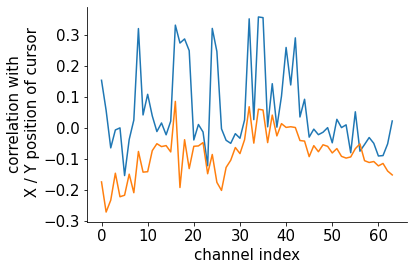

In [7]:
plt.subplot(1,4,1)
plt.plot(cx)
plt.plot(cy)

plt.ylabel('correlation with\n X / Y position of cursor')
plt.xlabel('channel index')

Text(0.5, 1.0, 'Variation of the X-position of the cursor and the target with time')

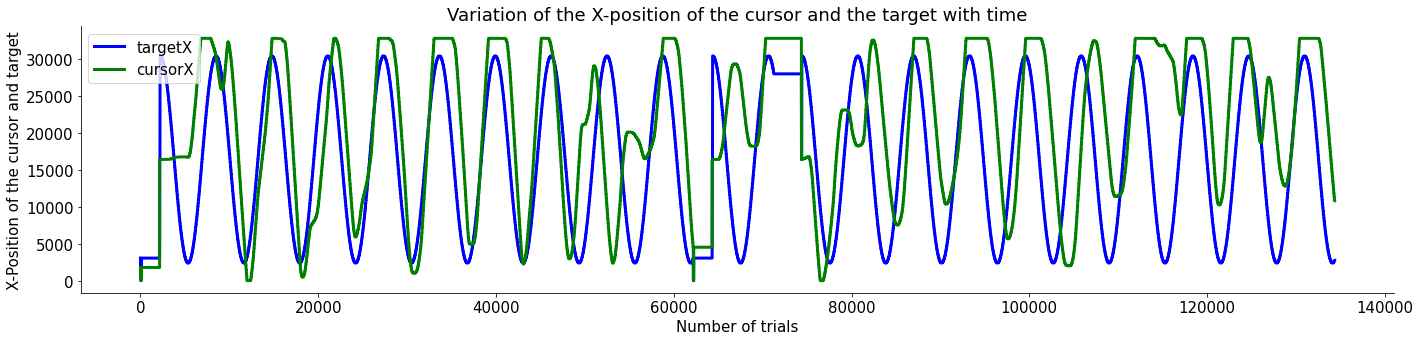

In [8]:
#plotting targetX and cursor X to visualise their correlation
targetX = dat["targetX"]
targetY = dat["targetY"]
cursorX = dat["cursorX"]
cursorY = dat["cursorY"]
plt.figure(figsize=(20, 5))
plt.plot(targetX, "b-", linewidth = 3)
plt.plot(cursorX, "g-", linewidth = 3)
plt.legend(["targetX", "cursorX"])
plt.xlabel("Number of trials")
plt.ylabel("X-Position of the cursor and target")
plt.title("Variation of the X-position of the cursor and the target with time")

## Analysis for Subject 2

In [9]:
#compiling all the voltage data from all the electrodes into one dictionary
size_v = np.shape(dat["V"])
voltage_dictionary_subject_2 = {}
for i in range(np.shape(dat["V"])[1]):
  voltage_dictionary_subject_2["voltage_channel%s" %i] = dat["V"][:, i]
print(voltage_dictionary_subject_2.keys())

dict_keys(['voltage_channel0', 'voltage_channel1', 'voltage_channel2', 'voltage_channel3', 'voltage_channel4', 'voltage_channel5', 'voltage_channel6', 'voltage_channel7', 'voltage_channel8', 'voltage_channel9', 'voltage_channel10', 'voltage_channel11', 'voltage_channel12', 'voltage_channel13', 'voltage_channel14', 'voltage_channel15', 'voltage_channel16', 'voltage_channel17', 'voltage_channel18', 'voltage_channel19', 'voltage_channel20', 'voltage_channel21', 'voltage_channel22', 'voltage_channel23', 'voltage_channel24', 'voltage_channel25', 'voltage_channel26', 'voltage_channel27', 'voltage_channel28', 'voltage_channel29', 'voltage_channel30', 'voltage_channel31', 'voltage_channel32', 'voltage_channel33', 'voltage_channel34', 'voltage_channel35', 'voltage_channel36', 'voltage_channel37', 'voltage_channel38', 'voltage_channel39', 'voltage_channel40', 'voltage_channel41', 'voltage_channel42', 'voltage_channel43', 'voltage_channel44', 'voltage_channel45', 'voltage_channel46', 'voltage_cha

In [10]:
H = np.shape(dat["V"])[1] #total number of channels

Text(0.5, 1.0, 'Visual correlation betewen ECoG data and CursorX position for channel 35 for 45 to 60 s of the trial')

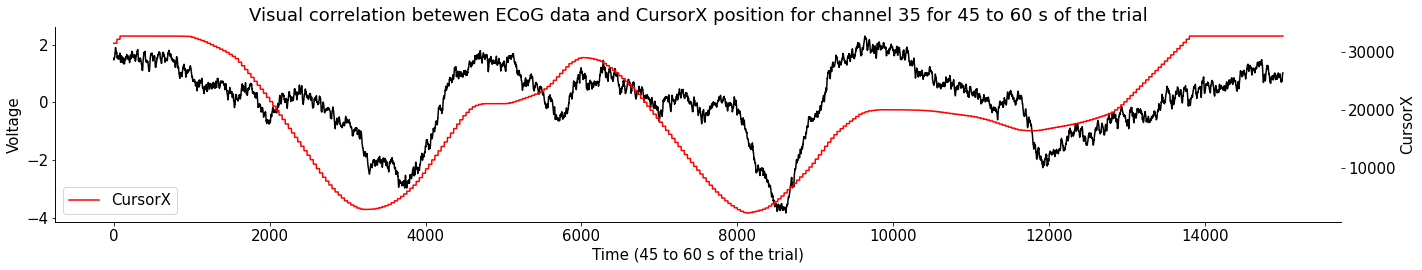

In [11]:
channel_35_45_to_60 = voltage_dictionary_subject_2["voltage_channel35"][45000:60000]
cursorX_45_to_60 = cursorX[45000:60000]
fig, ax_left = plt.subplots()
ax_right = ax_left.twinx()

#fig(figsize=(5, 5))

ax_left.plot(channel_35_45_to_60, color='black')
ax_left.set_ylabel("Voltage")
ax_left.set_xlabel("Time (45 to 60 s of the trial)")
#plt.legend(["CursorX"])
ax_right.plot(cursorX_45_to_60, color='red')
ax_right.set_ylabel("CursorX")
plt.legend(["CursorX"])
plt.title("Visual correlation betewen ECoG data and CursorX position for channel 35 for 45 to 60 s of the trial")

In [12]:
#compute the common average reference montage for each electrode
voltage_dictionary_referenced_subject_2 = voltage_dictionary_subject_2
for i in range(np.shape(dat["V"])[1]):
  for j in range(np.shape(dat["V"])[0]): #looping over timesteps
    voltage_dictionary_referenced_subject_2["voltage_channel%s" %i][j] = voltage_dictionary_subject_2["voltage_channel%s" %i][j] - (1/H)*np.sum(voltage_dictionary_subject_2["voltage_channel%s" %i][0:H-1])
print(voltage_dictionary_referenced_subject_2.keys())

dict_keys(['voltage_channel0', 'voltage_channel1', 'voltage_channel2', 'voltage_channel3', 'voltage_channel4', 'voltage_channel5', 'voltage_channel6', 'voltage_channel7', 'voltage_channel8', 'voltage_channel9', 'voltage_channel10', 'voltage_channel11', 'voltage_channel12', 'voltage_channel13', 'voltage_channel14', 'voltage_channel15', 'voltage_channel16', 'voltage_channel17', 'voltage_channel18', 'voltage_channel19', 'voltage_channel20', 'voltage_channel21', 'voltage_channel22', 'voltage_channel23', 'voltage_channel24', 'voltage_channel25', 'voltage_channel26', 'voltage_channel27', 'voltage_channel28', 'voltage_channel29', 'voltage_channel30', 'voltage_channel31', 'voltage_channel32', 'voltage_channel33', 'voltage_channel34', 'voltage_channel35', 'voltage_channel36', 'voltage_channel37', 'voltage_channel38', 'voltage_channel39', 'voltage_channel40', 'voltage_channel41', 'voltage_channel42', 'voltage_channel43', 'voltage_channel44', 'voltage_channel45', 'voltage_channel46', 'voltage_cha

### Analysis for a 300 ms time window

In [13]:
#doing it for larger time windows
#calculating the spectrogram for each time window separately
#say the time window is 300 ms
design_matrix = np.zeros((1, 64*4))
indices = np.arange(0, 134360, 300)
for i in range(len(indices)):
    row = np.array([])
    if i<=446:
        V = dat["V"][indices[i]:indices[i+1], :] # 0 to 40 ms for all the electrodes
        for j in range(np.shape(V)[1]): #select a particular electrode from above
            voltage = V[:, j]
            #run a spectral analysis for the electrode
            freqs, time, spectrogram = signal.spectrogram(voltage, fs = 1000)
            #compute the power spectral density
            freqs, psd = signal.welch(voltage, fs = 1000)
           
        


            #doing this for the fourth band in the channel
            indices_band4 = np.argwhere((freqs>=42)&(freqs<=70))
            power_band4 = np.array([])
            for k in indices_band4:
                power_band4 = np.append(power_band4, psd[k])
            if power_band4.size == 0:
                power_band4 = np.append(power_band4, [0])
            subject2_average_power_band4 = np.mean(power_band4)

            #doing this for the fifth band in the channel
            indices_band5 = np.argwhere((freqs>=70)&(freqs<=100))
            power_band5 = np.array([])
            for k in indices_band5:
                power_band5 = np.append(power_band5, psd[k])
            if power_band5.size == 0:
                power_band5 = np.append(power_band5, [0])
            subject2_average_power_band5 = np.mean(power_band5)

            #doing this for the sixth band in the channel
            indices_band6 = np.argwhere((freqs>=100)&(freqs<=140))
            power_band6 = np.array([])
            for k in indices_band6:
                power_band6 = np.append(power_band6, psd[k])
            if power_band6.size == 0:
                power_band6 = np.append(power_band6, [0])
            subject2_average_power_band6 = np.mean(power_band6)

            #doing this for the seventh band in the channel
            indices_band7 = np.argwhere((freqs>=140)&(freqs<=190))
            power_band7 = np.array([])
            for k in indices_band7:
                power_band7 = np.append(power_band7, psd[k])
            if power_band7.size == 0:
                power_band7 = np.append(power_band7, [0])
            subject2_average_power_band7 = np.mean(power_band7)
        
            subject2_average_power_band = np.array([subject2_average_power_band4, subject2_average_power_band5, subject2_average_power_band6, subject2_average_power_band7])
        
            row = np.append(row, subject2_average_power_band)
        
    elif i==447:
        V = dat["V"][indices[i]::, :] # last 40 ms for all the electrodes
        for j in range(np.shape(V)[1]): #select a particular electrode from above
            voltage = V[:, j]
            #run a spectral analysis for the electrode
            freqs, time, spectrogram = signal.spectrogram(voltage, fs = 1000)
            #compute the power spectral density
            freqs, psd = signal.welch(voltage, fs = 1000)
            
            #doing this for the fourth band in the channel
            indices_band4 = np.argwhere((freqs>=42)&(freqs<=70))
            power_band4 = np.array([])
            for k in indices_band4:
                power_band4 = np.append(power_band4, psd[k])
            if power_band4.size == 0:
                power_band4 = np.append(power_band4, [0])
            subject2_average_power_band4 = np.mean(power_band4)

            #doing this for the fifth band in the channel
            indices_band5 = np.argwhere((freqs>=70)&(freqs<=100))
            power_band5 = np.array([])
            for k in indices_band5:
                power_band5 = np.append(power_band5, psd[k])
            if power_band5.size == 0:
                power_band5 = np.append(power_band5, [0])
            subject2_average_power_band5 = np.mean(power_band5)

            #doing this for the sixth band in the channel
            indices_band6 = np.argwhere((freqs>=100)&(freqs<=140))
            power_band6 = np.array([])
            for k in indices_band6:
                power_band6 = np.append(power_band6, psd[k])
            if power_band6.size == 0:
                power_band6 = np.append(power_band6, [0])
            subject2_average_power_band6 = np.mean(power_band6)

            #doing this for the seventh band in the channel
            indices_band7 = np.argwhere((freqs>=140)&(freqs<=190))
            power_band7 = np.array([])
            for k in indices_band7:
                power_band7 = np.append(power_band7, psd[k])
            if power_band7.size == 0:
                power_band7 = np.append(power_band7, [0])
            subject2_average_power_band7 = np.mean(power_band7)
        
            subject2_average_power_band = np.array([subject2_average_power_band4, subject2_average_power_band5, subject2_average_power_band6, subject2_average_power_band7])
        
            row = np.append(row, subject2_average_power_band)
    
    design_matrix = np.vstack((design_matrix, row))

design_matrix = np.delete(design_matrix, 0, 0)

In [14]:
cursorX_totrain = cursorX[::300]
print(np.shape(cursorX_totrain))

(448, 1)


#### Fitting a Linear Regression with Lasso Regularisation

In [15]:
#fitting the Lasso Reression model
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(design_matrix, cursorX_totrain, test_size = 0.2, random_state = 40)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(358, 256) (358, 1)
(90, 256) (90, 1)


32767


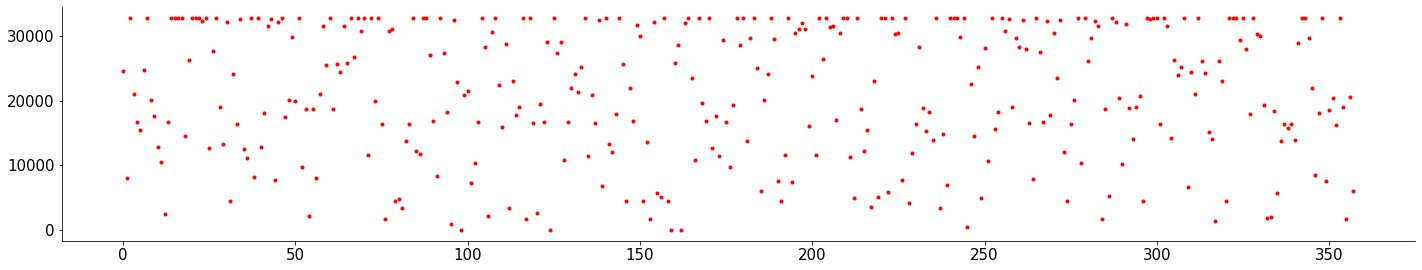

In [16]:
print(np.max(y_train))
plt.plot(y_train, "r.")

In [17]:
#fitting the Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#define the model
model = Lasso(alpha = 1)

#test accuracy on the test dataset
model_fit = model.fit(X_train, y_train)

#predict from the test dataset
predictions = model.predict(X_test)

print(np.shape(predictions))

(90,)


Text(0, 0.5, 'X-position of the cursor')

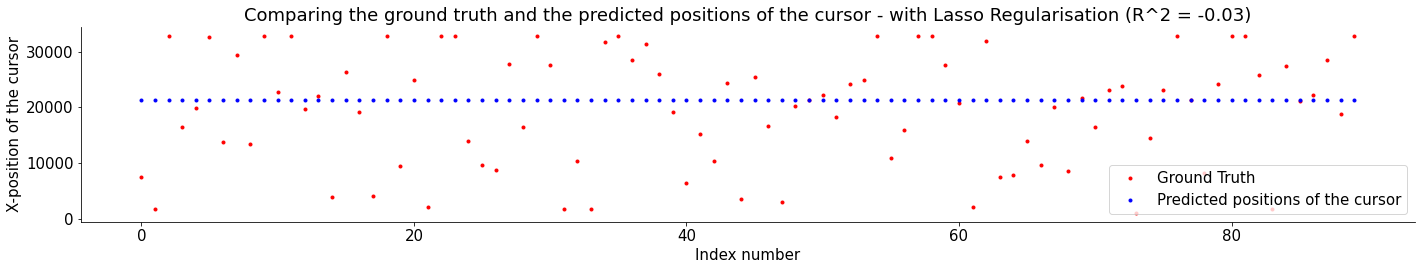

In [18]:
plt.plot(y_test, "r.")
plt.plot(predictions, "b.")
plt.legend(["Ground Truth", "Predicted positions of the cursor"])
plt.title("Comparing the ground truth and the predicted positions of the cursor - with Lasso Regularisation (R^2 = -0.03)")
plt.xlabel("Index number")
plt.ylabel("X-position of the cursor")

R^2 of the model

In [19]:
print(model.score(X_test, y_test))

-0.02678503716429015


#### Fitting a Linear Regression

In [20]:
#fit Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

#test accuracy on the test dataset
model_fit = model.fit(X_train, y_train)

#predict from the test dataset
predictions = model.predict(X_test)

print(np.shape(predictions))

(90, 1)


Text(0, 0.5, 'X-position of the cursor')

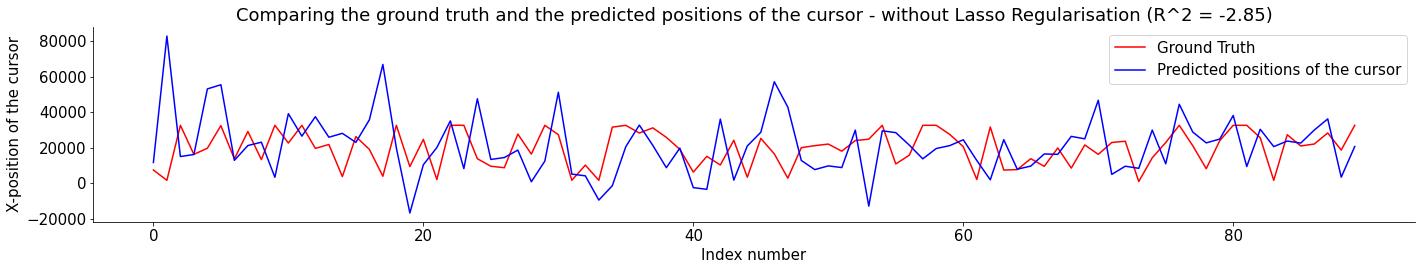

In [21]:
plt.plot(y_test, "r-")
plt.plot(predictions, "b-")
plt.legend(["Ground Truth", "Predicted positions of the cursor"])
plt.title("Comparing the ground truth and the predicted positions of the cursor - without Lasso Regularisation (R^2 = -2.85)")
plt.xlabel("Index number")
plt.ylabel("X-position of the cursor")

R^2 of the model

In [22]:
score = model.score(X_test, y_test)
print(score)

-2.853145452771287


##### Fitting the same model with Cross Validation

In [23]:
#define the model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=40)

#evaluate the model
scores = cross_val_score(model, X_train, y_train, scoring = "neg_root_mean_squared_error", cv=cv, n_jobs=1)

#force the scores to be positive
scores = np.absolute(scores)

print(scores)
print('Mean RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[ 22529.3171542   18326.9431014   25636.50827732  20714.9569899
  30855.32306063  25198.57469481  21956.89622174  31809.45455073
 390919.44927853  17647.03146733  20237.96363184  24835.74787456
  26233.27808539  25869.64467005 204650.56252778  21914.98663697
  22772.41067434  29510.2247034   25196.21379718  22647.12397551
  93833.9831215   23875.94858115  27423.00609615  27740.63509411
  24158.03013011  27981.00933448  25505.23081515  26858.20833384
  20915.63436645  25304.51293749]
Mean RMSE: 45101.960 (72826.356)


In [24]:
predictions_new = model.predict(X_test)

##### Checking the Linear Correlation between the extracted features and the x-position of the cursor

In [25]:
#checking the correlation between the extracted features and the x-position of the cursor
design_matrix_full = np.hstack((design_matrix, cursorX_totrain))
design_matrix_full_df = pd.DataFrame(design_matrix_full)
cor = design_matrix_full_df.corr()
#Correlation with the output variable
cor_target = abs(cor[256])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


256    1.0
Name: 256, dtype: float64


The results imply that there is not a single feature that is highly correlated with the cursor position, thus there is no information about the cursor position in the extracted features. One might need to use a different method to extract features from the dataset. 

##### Calculating the Spearman and Kendall Correlation coefficient between the extracted features and the x-position of the cursor

In [26]:
#calculating the Spearman's correlation function using scipy
from scipy.stats import spearmanr

cor_spear= design_matrix_full_df.corr(method="spearman")

#Correlation with the output variable
cor_target = abs(cor_spear[256])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

256    1.0
Name: 256, dtype: float64


In [27]:
#evaluating correlation based on the Kendall's correlation coefficient
cor_kendall = design_matrix_full_df.corr(method="kendall")

#Correlation with the output variable
cor_target = abs(cor_kendall[256])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

256    1.0
Name: 256, dtype: float64


The results imply that there is no monotonic correlation between features and the x-position of the cursor. They also do not have similar rank. This reduces the space of non linear models that can be fit to the data. 